In [8]:
"""
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
"""
Created on Tue Dec  5 17:06:21 2017

@author: Craig Russell
"""
import numpy as np
import sys
import cv2
from scipy import misc
from scipy import ndimage
from scipy.fftpack import fft, ifft, fftfreq
#import matplotlib.pyplot as plt

import pylab as plt
from drawnow import drawnow, figure

In [3]:
# !conda install -c conda-forge opencv --yes

done
done

## Package Plan ##

  environment location: /usr/local/Caskroom/miniconda/base

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    ffmpeg-4.0                 |       h01ea3c9_0        21.8 MB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    hdf5-1.10.2                |       hc401514_3         5.1 MB  conda-forge
    icu-58.2                   |    h0a44026_1000        22.3 MB  conda-forge
    jasper-2.0.14              |       h45d9283_1         1.2 MB  conda-forge
    libblas-3.8.0              |      14_openblas          10 KB  conda-forge
    libcblas-3.8.0             |      14_openblas          10 KB  conda-forge
    liblapack-3.8.0            |      14_openblas          10 KB  conda-for

In [7]:
# !pip install drawnow

In [2]:
#%% Plotting
save_flag = 0

fig = plt.figure()

ax0 = fig.add_subplot(221) 
ax1 = fig.add_subplot(222) 
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
plt.gray()
# plt.subplot(2,2,1);plt.subplot(2,2,2);plt.subplot(2,2,3);plt.subplot(2,2,4)
plt.tight_layout(pad=1.2)
#plt.imshow(lena)

In [3]:
#%% Import Lena

lena_RGB = cv2.imread('lena-128x128.jpg')
lena = cv2.cvtColor(lena_RGB,cv2.COLOR_RGB2GRAY) # RGBtoGray
lena = cv2.normalize(lena.astype('float'),  None, 0, 1, cv2.NORM_MINMAX) #mat2gray

cameraman_RGB = cv2.imread('cameraman-128x128.jpg')
cameraman = cv2.cvtColor(cameraman_RGB,cv2.COLOR_RGB2GRAY) # RGBtoGray
cameraman = cv2.normalize(cameraman.astype('float'),  None, 0, 1, cv2.NORM_MINMAX) #mat2gray

In [4]:
flag_record = 1;

width = 128;
image = np.zeros((width,width));
image_fusion =np.zeros((width*2,width*2))

bead_volume_bool = np.empty((width,width,width),bool)

bead_volume = np.zeros((width,width,width),float);
bead_volume_white = np.ones((width,width,width),float);
# bead_volume_white = np.ones((width,width,width));

radius = 6;
beads = 8

fov = np.arange(-width/2,width/2,1)
[x,y,z] = np.meshgrid(fov,fov,fov)
r = np.sqrt(x**2 + y**2)

In [25]:
def ramlak(img):    
    # img = reconstruction_back_projection[20:100,20:100,round(width/2)]
    f = fftfreq(img.shape[0]).reshape(-1, 1)   # digital frequency
    omega = 2 * np.pi * f                                # angular frequency
    fourier_filter = 2 * np.abs(f)
    x,y = np.meshgrid(np.linspace(-1,1,img.shape[0]),np.linspace(-1,1,img.shape[1]))

    r = np.sqrt(x**2 + y**2)
#     fourier_filter_2d = np.abs(r)

    projection = fft(img, axis=0) * fourier_filter
    filtered = np.real(ifft(projection, axis=0))
    return filtered


def draw_fig():
    #     img = reconstruction_back_projection[:,:,round(width/2)]
#     with plt.style.context(('default','/Users/craggles/OneDrive - University Of Cambridge/Programming/Python/stylesheets/thesis')):
        #%% Plotting
        save_flag = 0

        fig = plt.figure()

        ax0 = fig.add_subplot(221) 
        ax1 = fig.add_subplot(222) 
        ax2 = fig.add_subplot(223)
        ax3 = fig.add_subplot(224)
        plt.gray()
        # plt.subplot(2,2,1);plt.subplot(2,2,2);plt.subplot(2,2,3);plt.subplot(2,2,4)

        #plt.imshow(lena)

        plt.subplot(2,2,1)
#         plt.imshow(bead_volume[:,:,round(width/2)],interpolation='none')
#         plt.title('Original')

#         plt.subplot(2,2,2)
        plt.imshow(projection_xy,interpolation='none',vmin=0, vmax=1)
        plt.title('Slice (xy)')

        plt.subplot(2,2,3)
        plt.imshow(projection_xz,interpolation='none',vmin=0, vmax=1)
        plt.title('Projection (zx)')

#         plt.subplot(2,2,2)
#         plt.imshow(reconstruction_back_projection[:,:,round(width/2)],interpolation='none')
#         plt.title('Reconstruction (xy)')
      
#         reconstruction_back_projection[:,round(width/2),round(width/2)] = np.zeros(width)
#         reconstruction_back_projection[round(width/2),:,round(width/2)] = np.zeros(width)
#         reconstruction_back_projection[round(width/2),round(width/2),:] = np.zeros(width)
    
        plt.subplot(2,2,2)
        plt.imshow(reconstruction_back_projection[:,:,round(width/2)],interpolation='none')
        plt.title('Reconstruction (xy)')  
        
        plt.subplot(2,2,4)
        plt.imshow(reconstruction_back_projection[:,round(width/2),:],interpolation='none')
        plt.title('Reconstruction (zx)')  

        plt.tight_layout()
        fig.savefig('im/drift_beads_homo_noncoplanar_rand'+str(angle_idx)+'.pdf',format='pdf')
        fig.savefig('im/drift_beads_homo_noncoplanar_rand'+str(angle_idx)+'.png')

        plt.show()

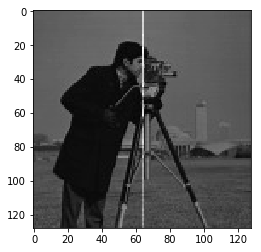

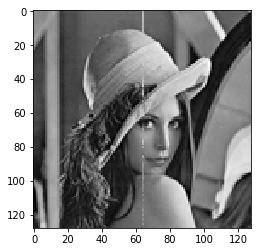

In [29]:
bead = [[]]*beads
bead_pos = [[]]*beads
bead = np.empty((beads,3))

bead[0] = np.array([0,0,10])#) bead_1_pos = [];
bead[1] = np.array([0,50,10])# bead_2_pos = [];
bead[2] = np.array([50,0,10]) #bead_3_pos = [];
bead[3] = np.array([50,-50,10])# bead_4_pos = [];
bead[4] = np.array([-50,0,10]) #bead_3_pos = [];
bead[5] = np.array([-50,50,10])# bead_4_pos = [];
bead[6] = np.array([-25,0,10]) #bead_3_pos = [];
bead[7] = np.array([-25,25,10])# bead_4_pos = [];

bead = (np.random.rand(beads,3)-0.5)*128
r = [[]]*len(bead)

# for i in np.arange(len(bead)):
#     bead_volume_bool = (bead_volume_bool) | ((np.sqrt((x-bead[i][0])**2 + (y-bead[i][1])**2 + (z-bead[i][2])**2))<(radius))
#Volume image of each bead
    

#bead_volume = ((r[0]<(radius)) | (r[1]<radius) | (r[2]<radius) | (r[3]<radius)).astype(float) #Combine all

# bead_volume = bead_volume_bool.astype(float)
# bead_volume_white = bead_volume_bool.astype(float)+1
# reconstruction_back_projection_white = bead_volume_bool.astype(float)

# #%% Plot Image
# #plt.subplot(2,2,1)
# #plt.imshow(bead_volume[:,:,round(width/2)])
# bead_volume[:,:,round(width/2)] = np.maximum(bead_volume[:,:,round(width/2)],lena)
#%% Plot Image
#plt.subplot(2,2,1)
#plt.imshow(bead_volume[:,:,round(width/2)])
bead_volume[:,:,round(width/2)] = np.maximum(bead_volume[:,:,round(width/2)],lena)
bead_volume[:,round(width/2),:] = np.maximum(bead_volume[:,round(width/2),:],cameraman)
# bead_volume[:,round(width/2),round(width/2)] = np.zeros(width)
#plt.imshow(bead_volume[:,:,round(width/2)])
#    drawnow

plt.imshow(bead_volume[:,round(width/2),:])
plt.gray();plt.show()
plt.imshow(bead_volume[:,:,round(width/2),])
plt.gray();plt.show()

0


/Users/craggles/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


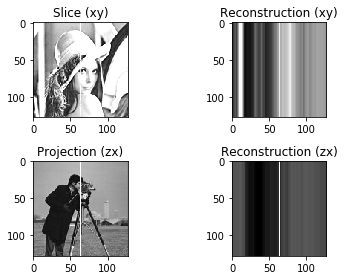

1


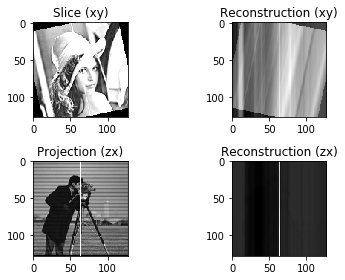

2


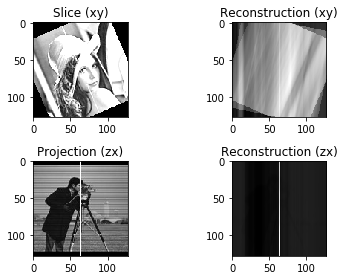

3


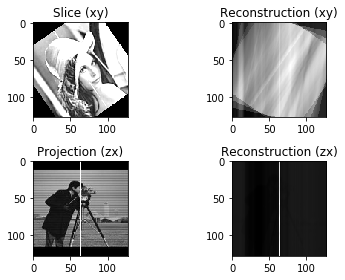

4


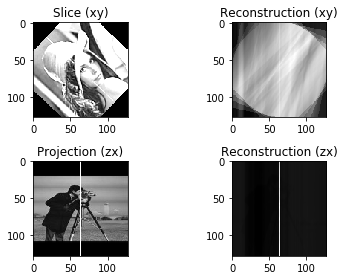

5


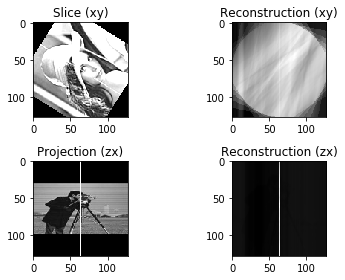

6


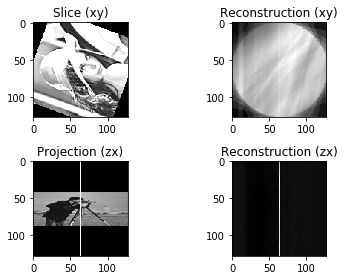

7


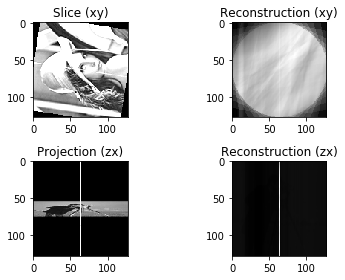

8


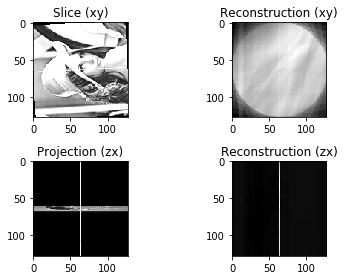

9


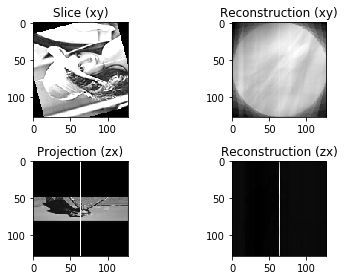

10


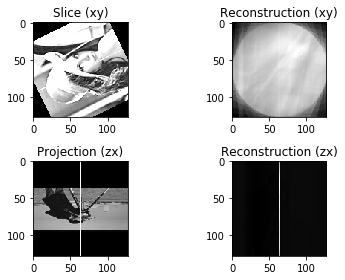

11


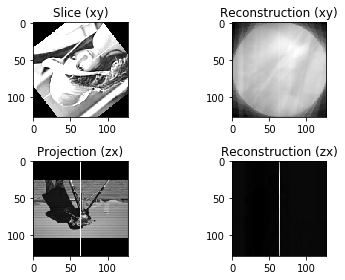

12


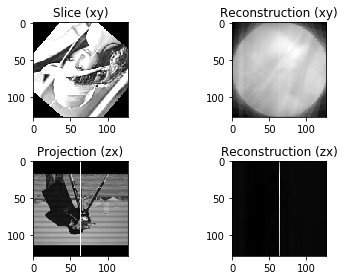

13


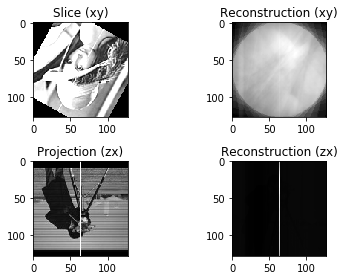

14


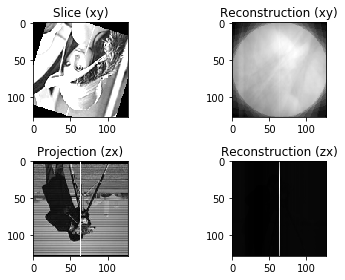

15


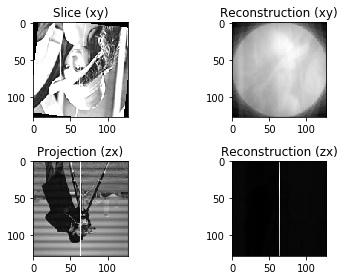

16


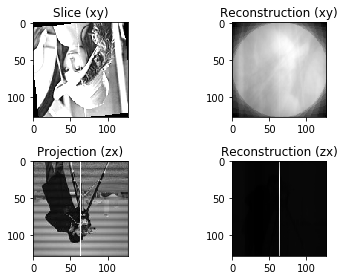

17


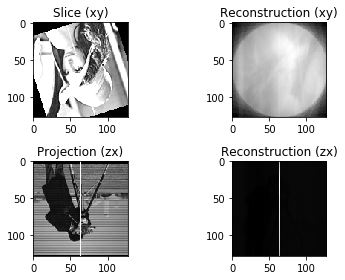

18


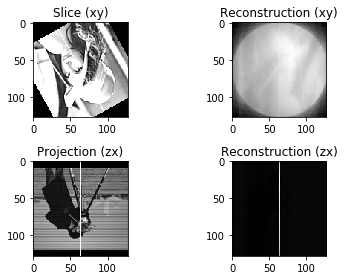

19


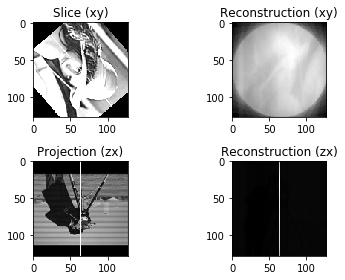

20


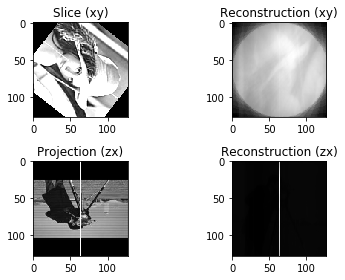

21


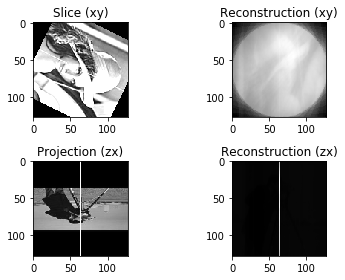

22


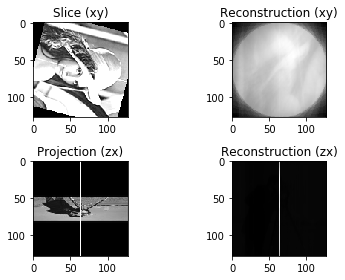

23


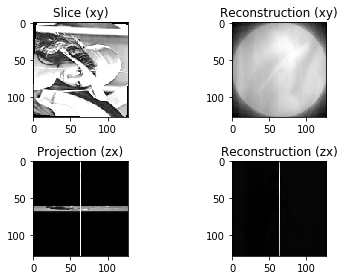

24


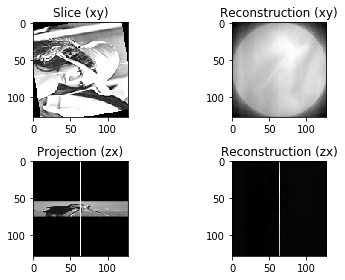

25


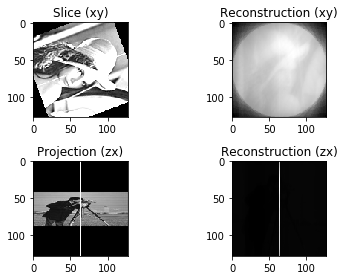

26


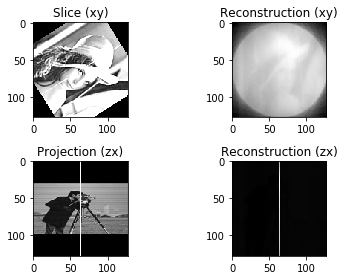

27


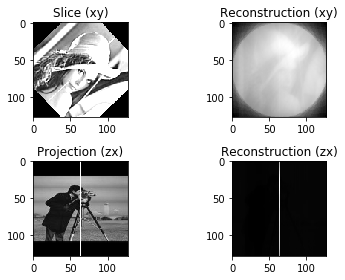

28


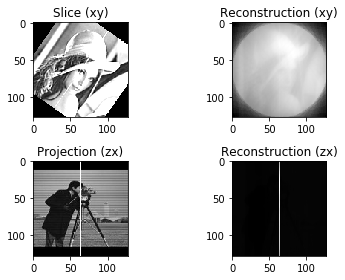

29


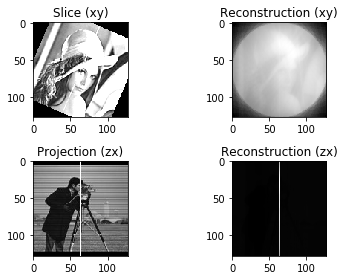

30


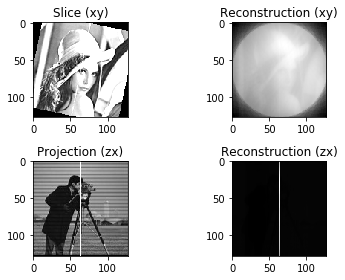

31


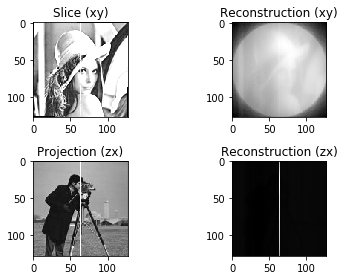

In [60]:
angles = np.linspace(0,2*np.pi,round(width/4))
#angles = np.linspace(0,0.1*np.pi,2)
reconstruction_back_projection = np.empty((width,width))
reconstruction_back_projection_white = np.empty((width,width))
transformed_volume = np.empty((width,width))

projection = np.empty((width,width))

bead_pos = np.empty((beads,angles.size,4))
bead_pos_new = np.empty((beads,angles.size,4))
sinugram = np.empty((128,len(angles)))
unit_pose_scaling = np.empty((len(angles),3))

#%% Plotting space setup
angle_idx=0

for angle_idx,theta in enumerate(angles):

#    print(theta)
    print(angle_idx)
    #%%

    
    t_x = 0#theta*2
    t_y = 0#theta*2
    t_z = 0;
    
    rotation_matrix = np.matrix(np.array([[np.cos(theta)    ,np.sin(theta)  ,0  ,t_x],
                                           [-np.sin(theta)  ,np.cos(theta)  ,0  ,t_y],
                                           [0               ,0              ,1  ,t_z],
                                           [0               ,0              ,0  ,1]
                                           ]))
    alpha = 0
    beta = 0#theta/100
    gamma = theta
    
#     rotation_matrix = np.matrix(np.array([[np.cos(beta)*np.cos(gamma)                                           ,np.cos(beta)*np.sin(gamma)                                             ,-np.sin(beta)              ,t_x],
#                                           [np.sin(alpha)*np.sin(beta)*np.cos(gamma)-np.cos(alpha)*np.sin(gamma) ,np.sin(alpha)*np.sin(beta)*np.sin(gamma)+np.cos(alpha)*np.cos(gamma)   ,np.sin(alpha)*np.cos(beta) ,t_y],
#                                           [np.cos(alpha)*np.sin(beta)*np.cos(gamma)+np.sin(alpha)*np.sin(gamma) ,np.cos(alpha)*np.sin(beta)*np.sin(gamma)-np.sin(alpha)*np.cos(gamma)   ,np.cos(alpha)*np.cos(beta) ,t_z],
#                                           [0               ,0              ,0  ,1]
#                                            ]))
    
    

    centre=0.5*np.array(bead_volume.shape)
    rot = rotation_matrix[0:3,0:3]
    trans = rotation_matrix[0:3,3]
    offset=np.array((centre-centre.dot(rot)).dot(np.linalg.inv(rot)))
    #offset=np.array((t_x,t_y,t_z))+np.array((centre-centre.dot(rot)).dot(np.linalg.inv(rot))) Adding translation vector onto intrinsic offset,
    dest_shape = (width*2, width*2,width*2)
    ' Homogenous transform'
    #rotation_matrix_corrected = rotation_matrix
    #rotation_matrix_corrected[0:3,3] = rotation_matrix_corrected[0:3,3] + (np.matrix((width/2,width/2,width/2))).T
    transformed_volume_no_t = ndimage.interpolation.affine_transform(bead_volume,rot,
                                                                     offset=-((offset.T).flatten()))
    transformed_volume = ndimage.interpolation.shift(transformed_volume_no_t,trans)
    #Fix lack of trnaslation
#    plt.clf()
#    plt.subplot(2,2,2)
#    plt.imshow(transformed_volume[:,:,round(width/2)])
    ' Calculate homogenous new coordinates'
    for j,element in enumerate(bead):
        bead_pos[j,angle_idx,:] = (rotation_matrix*np.concatenate((np.matrix(bead[j]).T,(np.matrix(1)).T))).flatten()
    #%%
    first_xy = bead[:,0:2]/width
    current_xy = bead_pos[:,angle_idx,0:2]/width
#    #%%  Essential Matrix Method
#
#    ' Find E'
    K = np.matrix('1,0,0;0,1,0;0,0,1')
#    E,mask = cv2.findEssentialMat(first_xy,current_xy)
#    R1,R2,t = cv2.decomposeEssentialMat(E)
#    unit_pose_scaling[angle_idx] = (np.divide(trans,t)).flatten()
#    points, R_pose, t_pose_unit, mask = cv2.recoverPose(E,first_xy,current_xy)
#    lhs = np.matrix(current_xy[0]).T-(R_pose*np.matrix(np.concatenate((first_xy[0],np.array([1])))).T)[0:2]
#    
#    #Cheating step to find which mmatrices are right
#    square_difference_E_R = np.empty(2)
#    
#    if sum(sum(((np.array(rot)) - (R1))**2)) < sum(sum(((np.array(rot)) - (R2))**2)):    
#        R_E = np.matrix(R1)
#    else:
#        R_E = np.matrix(R2)
#        
#    t_E = (np.matrix(current_xy[0]).T - (R_E*np.matrix(np.concatenate((first_xy[0],np.array([1])))).T)[0:2])*width
#    t_E_scale = np.matrix.mean(np.divide(t_E,t_pose_unit[0:2]))
#    trans_E = np.matrix((t_pose_unit*t_E_scale))
#    
#    if sum(sum((np.array((trans - trans_E)))**2)) < sum(sum((np.array((trans + trans_E)))**2)):    
#        abs_trans_E = np.matrix(trans_E)
#    else:
#        abs_trans_E = np.matrix(-trans_E)
#    #t_pose = (np.matrix(current_xy[0]).T - (R_pose*np.matrix(np.concatenate((first_xy[0],np.array([1])))).T)[0:2])*width
##    E_n = E/(np.sqrt(np.trace(E.T*E))/2)
##    U,S,V = np.linalg.svd(E)
##    E_norm = np.matrix(U)*np.matrix('1,0,0;0,1,0;0,0,0')*np.matrix(V)
##    b_0 = np.sqrt((1-E_norm.T*E_norm)[0,0])
##    b_1 = np.sqrt((1-E_norm.T*E_norm)[1,1])
##    b_2 = np.sqrt((1-E_norm.T*E_norm)[2,2])
    #%%
    ' Find H'    

    H,inliers = cv2.findHomography(first_xy,current_xy)
    a,R,T,translation = cv2.decomposeHomographyMat(H,K)   
    T = np.multiply(T,width)
            #Cheating step to find which mmatrices are right
    square_difference_R = np.empty(len(R))
    square_difference_T = np.empty(len(T))
    for count,current_R in enumerate(R):
        square_difference_R[count] = sum(sum(((np.array(rot)) - (current_R))**2))
        
    for count,current_T in enumerate(T):
        square_difference_T[count] = sum(sum(((np.array(trans)) - (current_T))**2))
#    for j,element in enumerate(bead):     
#        bead_pos_new[j,angle_idx,:] = ((R.I)*np.concatenate((np.matrix(bead[j]).T,(np.matrix(1)).T))).flatten()
    #%% Cheating step to find which mmatrices are right

        
    #%% Update rotation matrix
    #rot_square_difference = sum(sum(((np.array(rot)) - np.matrix(R[np.argmin(square_difference_R)]))**2))
    
    #rot = np.matrix(R[np.argmin(square_difference_R)])
        
        
#    rot  = R_E
    #trans = np.matrix(T[np.argmin(square_difference_T)])   
        #trans_square_difference = sum(sum(((np.array(trans)) - (current_R))**2))
    
    ## Square difference of real matrix and found matrix.
#    trans = abs_trans_E
#    for j,element in enumerate(bead):     
#        bead_pos_new[j,angle_idx,:] = np.concatenate([np.array(((rot.I)*np.matrix(bead[j]).T)).flatten(),np.array([1])])
    #%% Projection
    ' Projection'
    projection = np.sum(transformed_volume,axis=0)
    projection_xy = np.max(transformed_volume,axis=2)
    projection_xz = np.max(transformed_volume,axis=1)
    sinugram[:,angle_idx] = np.sum(projection,axis=1)
    #%%
    back_projection = np.tile(projection,(width,1,1)) #check extensively.
    #transformed_back_projection = ndimage.interpolation.affine_transform(back_projection,(rotation_matrix.I))
    back_projection = ndimage.interpolation.shift(back_projection,-trans)
    offset=np.array((centre-centre.dot(rot.I)).dot(np.linalg.inv(rot.I)))
    transformed_back_projection = ndimage.interpolation.affine_transform(back_projection,(rot.I),
                                                                         order=2,offset=-((offset.T).flatten()))
    
    scaling = (angles.size-1)/angles.size
    
    reconstruction_back_projection = transformed_back_projection*(1/(angle_idx+1)) + reconstruction_back_projection*((angle_idx)/(angle_idx+1))
#     reconstruction_back_projection = ramlak(transformed_back_projection*(1/(angle_idx+1))) + reconstruction_back_projection*((angle_idx)/(angle_idx+1))
    draw_fig()
    #drawnow(draw_fig,angle_idx) 
    transformed_back_projection_white = ndimage.interpolation.affine_transform(bead_volume_white,(rot.I),
                                                                         order=2,offset=-((offset.T).flatten()))
    
    reconstruction_back_projection_white = transformed_back_projection_white + reconstruction_back_projection_white

/Users/craggles/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


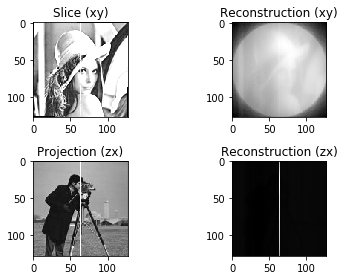

In [59]:
draw_fig()
from scipy import io

# Confirmed that the ram lak filter is working as it should
# io.savemat('reconstruction_back_projection.mat',mdict={'reconstruction_back_projection': reconstruction_back_projection})

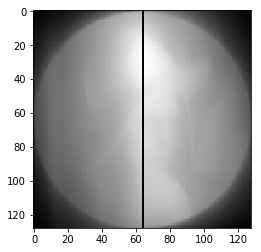

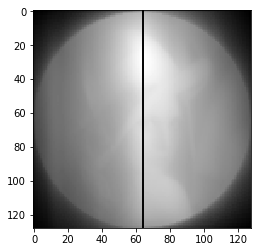

In [30]:
reconstruction_back_projection[:,round(width/2),round(width/2)] = np.zeros(width)

plt.imshow(reconstruction_back_projection[:,:,round(width/2)])
plt.show()
plt.imshow(np.max(reconstruction_back_projection,axis=2))
plt.show()

In [31]:
# flat_reconstruction_back_projection = 1*(reconstruction_back_projection_white)

# plt.imshow(flat_reconstruction_back_projection[:,:,round(width/2)])
# plt.show()
# plt.plot(flat_reconstruction_back_projection[:,round(width/2),round(width/2)])
# plt.show()

# # fft2_flat = fft(flat_reconstruction_back_projection, axis=0)
# # plt.plot(fft2_flat[:,round(width/2),round(width/2)])
# # plt.show()

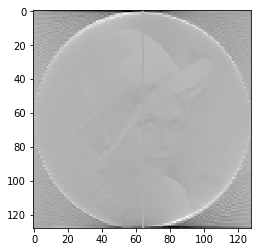

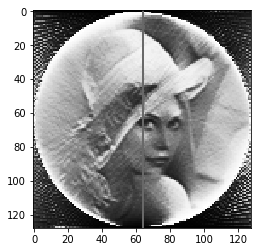

In [48]:
from skimage import exposure

img = reconstruction_back_projection[:,:,round(width/2)]
img_eq = exposure.equalize_hist(ramlak(img))
plt.imshow(ramlak(img))
plt.show()
plt.imshow(img_eq)
plt.show()

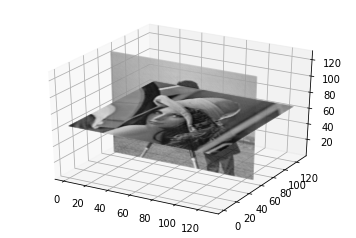

In [37]:
# from mpl_toolkits.mplot3d import Axes3D

# from matplotlib.cbook import get_sample_data
# from matplotlib._png import read_png
# from skimage.color import rgb2gray


# # plt.hold(True)
# x,y = np.meshgrid(np.arange(0,128),np.arange(0,128))
# # img = read_png("lena-128x128.png")
# # lena_rbg = cv2.cvtColor(lena,cv2.COLOR_GRAY2RGB)
# # cameraman_rbg = cv2.cvtColor(camerman,cv2.COLOR_GRAY2RGB)

# # x,y = ogrid[0:128,0:128]

# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(-x+128,-y+128,np.ones((128,128))*128/2, rstride=1,cstride=1,cmap=plt.cm.gray,facecolors=lena_RGB/255,alpha=0.3)
# ax.plot_surface(-x+128,np.ones((128,128))*128/2,-y+128, rstride=1,cstride=1,cmap=plt.cm.gray,facecolors=cameraman_RGB/255,alpha = 0.3)
# plt.savefig("crossover_a.pdf")
# plt.show()

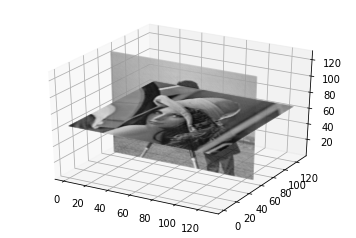

In [38]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(-x+128,np.ones((128,128))*128/2,-y+128, rstride=1,cstride=1,cmap=plt.cm.gray,facecolors=cameraman_RGB/255,alpha = 0.3,zorder=-1)
# ax.plot_surface(-x+128,-y+128,np.ones((128,128))*128/2, rstride=1,cstride=1,cmap=plt.cm.gray,facecolors=lena_RGB/255,alpha=0.3,zorder=1)
# plt.savefig("crossover_b.pdf")
# plt.show()